# Testing and regularization

In [1]:
!git clone https://github.com/s7s/machine_learning_1.git
%cd  machine_learning_1/polynomial_regression

Cloning into 'machine_learning_1'...
remote: Enumerating objects: 236, done.
remote: Counting objects: 100% (236/236), done.
remote: Compressing objects: 100% (173/173), done.
remote: Total 236 (delta 112), reused 184 (delta 60), pack-reused 0
Receiving objects: 100% (236/236), 35.88 MiB | 15.18 MiB/s, done.
Resolving deltas: 100% (112/112), done.
/content/machine_learning_1/polynomial_regression


In [82]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
random.seed(0)

## Defining our dataset

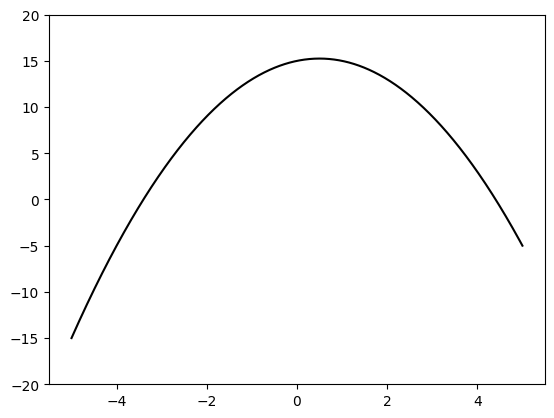

In [84]:
# Our original polynomial is -x^2+x+15
coefs = [15,1,-1]

def polynomial(coefs, x):
    n = len(coefs)
    return sum([coefs[i]*x**i for i in range(n)])

def draw_polynomial(coefs):
    n = len(coefs)
    x = np.linspace(-5, 5, 1000)
    plt.ylim(-20,20)
    plt.plot(x, sum([coefs[i]*x**i for i in range(n)]), linestyle='-', color='black')

draw_polynomial(coefs)

In [85]:
X = []
Y = []
for i in range(40):
    x = random.uniform(-5,5)
    y = polynomial(coefs, x) + random.gauss(0,2)
    X.append(x)
    Y.append(y)
X=np.array(X)
Y=np.array(Y)

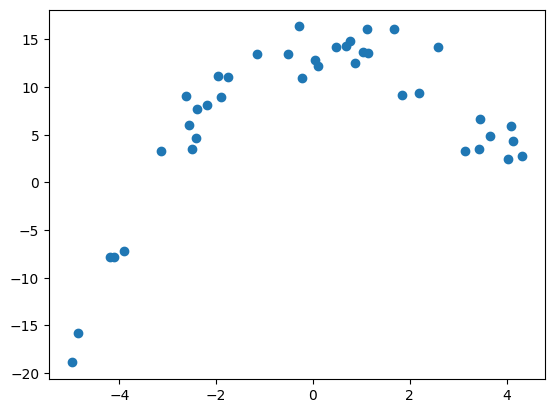

In [87]:
plt.scatter(X, Y)
#draw_polynomial(coefs)

## Training a polynomial regression model

In [88]:
for datasample in zip(X,Y):
    print(datasample)

(3.4442185152504816, 6.685961311021467)
(-2.4108324970703663, 4.690236225597948)
(0.11274721368608542, 12.205789026637378)
(-1.9668727392107255, 11.133217991032268)
(-0.23403045847644144, 10.927272159051856)
(0.046868558173902564, 12.8584762866286)
(-2.1816215560029617, 8.16012255928749)
(-2.4949365863755943, 3.5061587527226514)
(4.097462559682402, 5.933186396721837)
(4.021659504395828, 2.454299054753137)
(-1.8985243068066735, 8.956020414039855)
(1.8398393191544127, 9.208004401915796)
(-0.2785728454728664, 16.36505651355184)
(1.1088697344380165, 16.14144978027318)
(4.130110532378982, 4.299534274468492)
(3.6530992777164, 4.83366913200435)
(-2.395076896080406, 7.723543125251446)
(-4.8595829983598104, -15.848718674227753)
(2.1970468640395415, 9.366124268570305)
(1.6815320123185087, 16.070558182542374)
(-4.988571806855717, -18.893035332565795)
(-2.5608912311286804, 6.043189895391749)
(-1.7479563725260991, 11.091071520573042)
(0.6751074062067186, 14.272553413210698)
(-2.6138407138477984, 9.

### Adding columns to our dataset corresponding to $x^2, x^3, \ldots, x^{200}$

In [89]:
from sklearn.preprocessing import PolynomialFeatures
def addPoly(X,polyDegree):
    ## TODO ##
    #use sklearn (PolynomialFeatures method)

    poly = PolynomialFeatures(polyDegree , include_bias=False)
    X = poly.fit_transform(X.reshape(-1,1))


    return X
X_poly=addPoly(X,25)

In [90]:
print(X_poly.shape)
print(X_poly[0,:])

(40, 25)
[3.44421852e+00 1.18626412e+01 4.08575284e+01 1.40722256e+02
 4.84678199e+02 1.66933763e+03 5.74956356e+03 1.98027533e+04
 6.82050095e+04 2.34912956e+05 8.09091554e+05 2.78668811e+06
 9.59796279e+06 3.30574811e+07 1.13857189e+08 3.92149037e+08
 1.35064697e+09 4.65192332e+09 1.60222404e+10 5.51840971e+10
 1.90066089e+11 6.54629143e+11 2.25468581e+12 7.76563063e+12
 2.67465288e+13]


## Splitting data into training and testing

In [91]:
from sklearn.model_selection import train_test_split
## TODO ##
# use sklearn (train_test_split) to split data to 80% training 20% testing
X_train, X_test, y_train, y_test = train_test_split( X_poly , Y, test_size=0.2 )

In [92]:
from sklearn.metrics import mean_squared_error
def display_results(model):
    coefs = [model.intercept_]
    coefs += list(model.coef_)
    ytrain_predict=model.predict(X_train)
    ytest_predict=model.predict(X_test)
    train_error=np.sqrt(mean_squared_error(y_train,ytrain_predict))
    test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
    print("Training error (rmse):", train_error)
    print("Testing error (rmse):", test_error)
    plt.scatter(X_train[:,0], y_train, marker='o')
    plt.scatter(X_test[:,0], y_test, marker='^')
    draw_polynomial(coefs)
    plt.show()
    print("Polynomial coefficients")
    print(coefs)

## Training a polynomial regression model with no regularization

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
## TODO ##
# use sklearn linear regression to fit the data
# normalization trick ;)

#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)


model_no_reg = LinearRegression()
model_no_reg.fit(X_train , y_train)


LinearRegression()

Training error (rmse): 1.5055322482178923
Testing error (rmse): 202.82636325579915


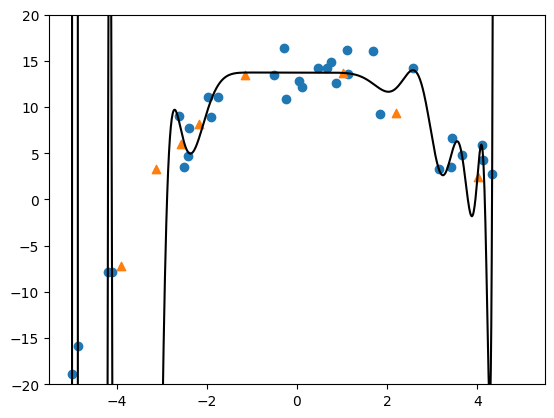

Polynomial coefficients
[13.73602694997617, -0.00029548566783225223, -7.766645333917356e-05, -0.0009243203867001787, -0.0009980600581190524, -0.002489810024872884, -0.0024896410172321934, -0.005661082832298566, -0.004923034488492664, -0.00943895706109166, -0.006182803830428452, -0.006597515036990953, -0.0014284132643522132, 0.009867673187878649, 0.001415859567073746, -0.003437995204525628, -0.00026775908953192995, 0.0005601007135647178, 2.0752104164706287e-05, -4.937797422918017e-05, -6.573561711910051e-07, 2.4259624548471186e-06, 3.051850501621122e-09, -6.261788900850763e-08, 1.5483052278900881e-10, 6.634718574099465e-10]


In [94]:
display_results(model_no_reg)

## Training a polynomial regression model with L1 regularization

In [101]:
from sklearn import linear_model
from sklearn.linear_model import Lasso
## TODO ##
# use sklearn Lasso (linear regression with L1 Norm) to fit the data
# normalization trick ;)

model_L1_reg = Lasso(alpha=10)
model_L1_reg.fit(X_train , y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.145e+02, tolerance: 2.419e-01
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=10)

Training error (rmse): 2.224381082376855
Testing error (rmse): 1.589970709971582


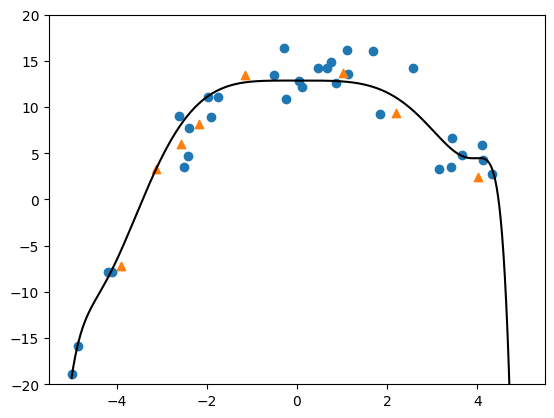

Polynomial coefficients
[12.869638829318799, 0.0, -0.0, 0.0, -0.10018040920400247, 0.009123680578257444, 0.0003799448119922523, -0.0004473340268784455, 0.00013154193361090077, 1.0075284144674025e-05, 2.540815492089473e-06, 3.6973568226623006e-07, 2.9157812415273336e-08, 5.096310514266373e-09, -1.0306231919215073e-09, -1.579252750865669e-10, -1.0036199175596867e-10, -1.6304693294085044e-11, -5.347710906931021e-12, -8.715357347758198e-13, -2.350736354228279e-13, -3.803273642406072e-14, -9.359456462080804e-15, -1.4965065389479106e-15, -3.506965924409992e-16, -5.52386847199323e-17]


In [102]:
display_results(model_L1_reg)

## Training a polynomial regression model with L2 regularization

In [117]:
from sklearn import linear_model
from sklearn.linear_model import Ridge

## TODO ##
# use sklearn Ridge (linear regression with L2 Norm) to fit the data
# normalization trick ;)
model_L2_reg = Ridge(alpha=10000)
model_L2_reg.fit(X_train , y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.84922e-32): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge(alpha=10000)

Training error (rmse): 1.5658459280736292
Testing error (rmse): 25.08295152003176


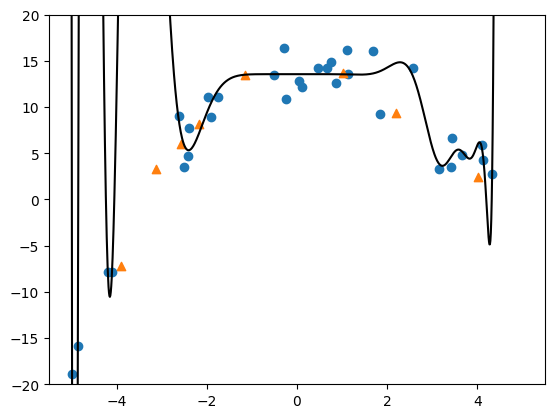

Polynomial coefficients
[13.562141725530912, 0.00017173166884081636, -0.00037688111550530614, -0.0002955536736066697, -0.0016758165680409842, -0.0014470569058783692, -0.004260565556572058, -0.002979702776596876, -0.0071157833919553645, -0.0008935938730332662, -0.004939823487643166, 0.010194977686147303, 0.003250019107977547, -0.0039386576040425095, -0.0008472588883358189, 0.0006151016727608831, 0.00013170055631788304, -4.877335388457939e-05, -1.242222140440346e-05, 1.9499069018397223e-06, 6.813068672702719e-07, -2.59491023625509e-08, -1.9867608474618336e-08, -5.927908924552501e-10, 2.3794660798966655e-10, 1.7010554729507738e-11]


In [118]:
display_results(model_L2_reg)

## Viewing the predictions in the testing set

In [65]:
import pandas as pd
from IPython.display import display
predictions={}
predictions ['x']=X_test[:,0]
predictions ['y']=y_test
predictions['No reg'] = model_no_reg.predict(X_test)
predictions['L1 reg'] = model_L1_reg.predict(X_test)
predictions['L2 reg'] = model_L2_reg.predict(X_test)
predictions=pd.DataFrame.from_dict(predictions)
display(predictions)

,x,y,No reg,L1 reg,L2 reg
0,-2.613841,9.085322,7.284453,5.830429,5.491933
1,3.424602,3.526993,0.037527,4.881884,1.890379
2,-0.278573,16.365057,13.289265,12.963267,12.460789
3,3.444219,6.685961,0.315322,4.789073,2.322068
4,0.474409,14.257854,13.288776,12.979477,12.793840
5,-4.195542,-7.812998,-369.963189,-8.935982,-47.569391
6,-0.520304,13.478608,13.289471,12.932918,12.493343
7,1.031856,13.676624,13.251516,12.991572,14.064316


### Real Example (Predict fuel efficiency)

In [66]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [67]:
#### Get data

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

dataset = raw_dataset.copy()

#### Clean data

dataset.isna().sum()

dataset = dataset.dropna()

dataset.isna().sum()

dataset.head()

dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')

dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1


In [68]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

#### normal linear regression

In [70]:
# normal linear regression
X_train=train_dataset[['Horsepower']]
y_train=train_dataset[['MPG']]
X_test=test_dataset[['Horsepower']]
y_test=test_dataset[['MPG']]

model_no_reg = LinearRegression() #normalize=True
model_no_reg.fit(X_train, y_train)
ytest_predict=model_no_reg.predict(X_test)
test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
print(test_error)

4.5639128558497175


#### using 50th order

In [71]:
X_train=train_dataset[['Horsepower']]
y_train=train_dataset[['MPG']]

X_test=test_dataset[['Horsepower']]
y_test=test_dataset[['MPG']]

from sklearn.preprocessing import PolynomialFeatures
def addPoly(X,polyDegree):
    poly = PolynomialFeatures(polyDegree,include_bias=False)
    X=poly.fit_transform(X)
    return X
X_trainPoly=addPoly(X_train,50)
X_testPoly=addPoly(X_test,50)

##### no regularization

In [73]:
# no regularization
from sklearn.linear_model import LinearRegression
model_no_reg = LinearRegression()#normalize=True
model_no_reg.fit(X_trainPoly, y_train)
ytest_predict=model_no_reg.predict(X_testPoly)
test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
print(test_error)

94.67301043216226


##### lasso regularization

In [75]:
# lasso regularization
from sklearn import linear_model
model_L1_reg = linear_model.Lasso(alpha=0.01) #,normalize=True
model_L1_reg.fit(X_trainPoly, y_train)
ytest_predict=model_L1_reg.predict(X_testPoly)
test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
print(test_error)

3.730447503028277


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.200e+03, tolerance: 1.870e+00
  model = cd_fast.enet_coordinate_descent(


##### ridge regularization

In [77]:
# ridge regularization
from sklearn import linear_model
model_L2_reg = linear_model.Ridge(alpha=0.01) #,normalize=True
model_L2_reg.fit(X_trainPoly, y_train)
ytest_predict=model_L2_reg.predict(X_testPoly)
test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
print(test_error)

30.11233495284351
